## Pobranie danych z pliku

In [42]:
import numpy as np

file_name = "creditcard.csv"
file = open(file_name)
file.readline()  # skip the header
data = np.loadtxt(file, delimiter=',')

## Wydzielenie zbiorów

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data[:, :30], data[:, 30:], random_state=0)
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

## Resampling klas

In [44]:
from imblearn.over_sampling import ADASYN

X_train, Y_train = ADASYN().fit_resample(X_train, Y_train)

c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Inicjacja struktur danych do testów

In [45]:
scores = []
methods = []
features_number = []

## Wybór metody

### PCA

In [46]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

random_forest = make_pipeline(StandardScaler(), PCA(n_components=15), RandomForestClassifier(n_jobs=-1))
random_forest.fit(X_Train_PCA, Y_train)
cm = confusion_matrix(Y_test, random_forest.predict(X_test[:,:15]))
scores.append(cm[0, 1])
print(cm[0, 1])
features_number.append(X_Train_PCA.shape[1])
methods.append("PCA")

31959


### Feature aglomeration

In [54]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import datasets, cluster

X_Train_FA = cluster.FeatureAgglomeration(n_clusters=15).fit_transform(X_train, Y_train)

random_forest = make_pipeline(StandardScaler(), cluster.FeatureAgglomeration(), RandomForestClassifier(n_jobs=-1))
random_forest.fit(X_Train_FA, Y_train)
cm = confusion_matrix(Y_test, random_forest.predict(X_test[:,:15]))
scores.append(cm[0, 1])
print(cm)
features_number.append(X_Train_FA.shape[1])
methods.append("Feature Aglomeration")

[[71082     0]
 [  120     0]]


## Recursive feature elimination 

In [55]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

X_Train_RFE = RFE(RandomForestClassifier(n_jobs=-1), n_features_to_select=15).fit_transform(X_train, Y_train)

random_forest = make_pipeline(StandardScaler(), RandomForestClassifier(n_jobs=-1))
random_forest.fit(X_Train_RFE, Y_train)
cm = confusion_matrix(Y_test, random_forest.predict(X_test[:,:15]))
scores.append(cm[0, 1])
print(cm)
features_number.append(X_Train_RFE.shape[1])
methods.append("RFE")

[[70960   122]
 [  118     2]]


###  Gaussian random projection

In [60]:
from sklearn import random_projection


X_Train_Ridge = random_projection.GaussianRandomProjection(n_components=15).fit_transform(X_train, Y_train)

random_forest = make_pipeline(StandardScaler(), RandomForestClassifier(n_jobs=-1))
random_forest.fit(X_Train_Ridge, Y_train)
cm = confusion_matrix(Y_test, random_forest.predict(X_test[:,:15]))
scores.append(cm[0, 1])
print(cm)
features_number.append(X_Train_RFE.shape[1])
methods.append("GRP")

[[71054    28]
 [  119     1]]


## Wyniki

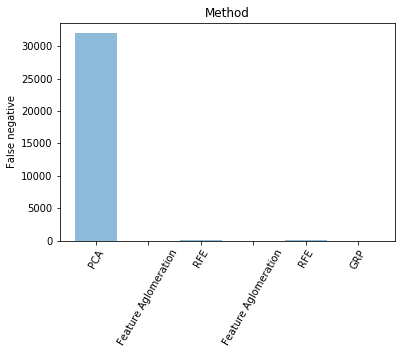

In [58]:
import matplotlib.pyplot as plt

plt.bar(np.arange(len(methods)), scores, align='center', alpha=0.5)
plt.xticks(np.arange(len(methods)), methods, rotation = 60)
plt.ylabel('False negative')
plt.title('Method')

plt.show()

### Wyniki: liczba wymiarów

In [ ]:
import matplotlib.pyplot as plt

plt.bar(np.arange(len(methods)), features_number, align='center', alpha=0.5)
plt.xticks(np.arange(len(methods)), methods, rotation = 60)
plt.ylabel('False negative')
plt.title('Method')

plt.show()